In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings("ignore")

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    <b style="text-align:center;padding-left:28%">Reading the Train and Test datasets</b>
</div>

In [3]:
train = pd.read_csv("/kaggle/input/playground-series-s3e16/train.csv",index_col='id')
test = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv')


In [4]:
testid = test['id']

In [5]:
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [6]:
test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    <p>Since the target column (age) is Numerical and continious. We can use regression algorithms.</p>
    <p>Now our task is to encode all the categorical columns to Numerical columns.</p>
</div>

In [7]:
train.Sex.value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    <p>There are three kinds of values 'M', 'F', 'I'</p>
    <p>Let's Encode the Sex column</p>
</div>

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])

In [10]:
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [11]:
test['Sex'] = le.transform(test['Sex'])

In [12]:
test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,1,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,0,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,0,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,1,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    <p> Now, as we encoded all the data into Numerical values. It's time to check for any NaN values and fill them.</p>
    
</div>



In [13]:
train.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [14]:
test.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    <b style='padding-left:35%'>Basic EDA & Preprocessing</b>
   </div>

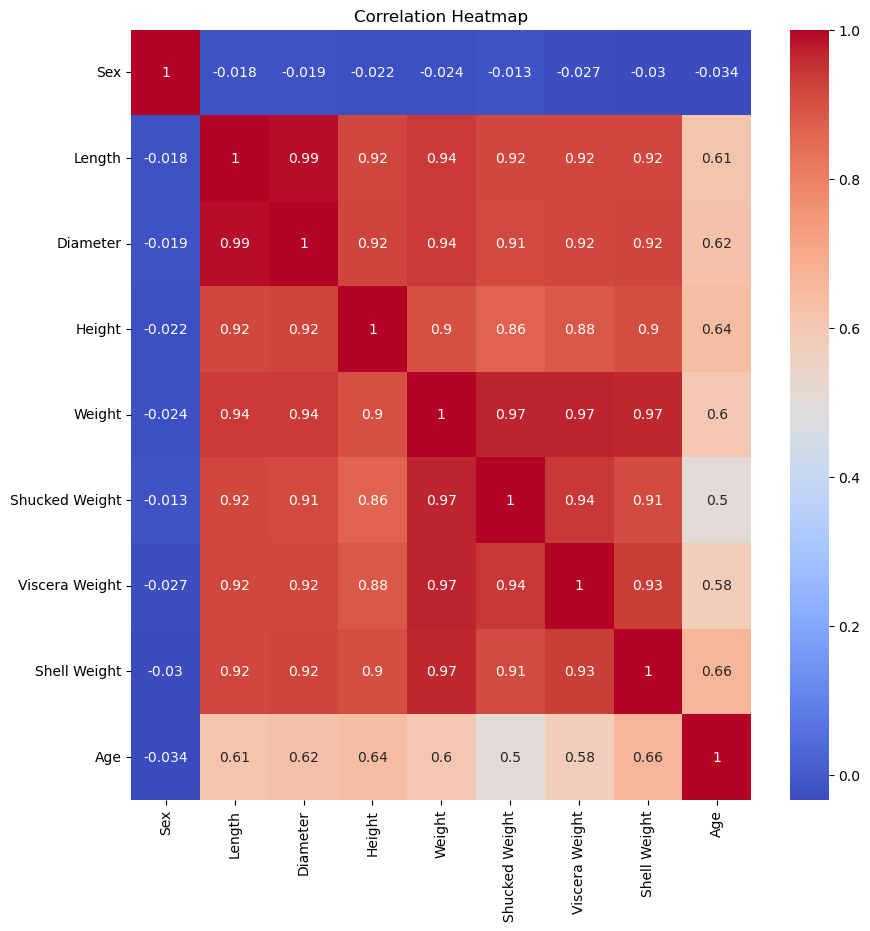

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">Columns before Scaling

array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Shucked Weight'}>],
       [<Axes: title={'center': 'Viscera Weight'}>,
        <Axes: title={'center': 'Shell Weight'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

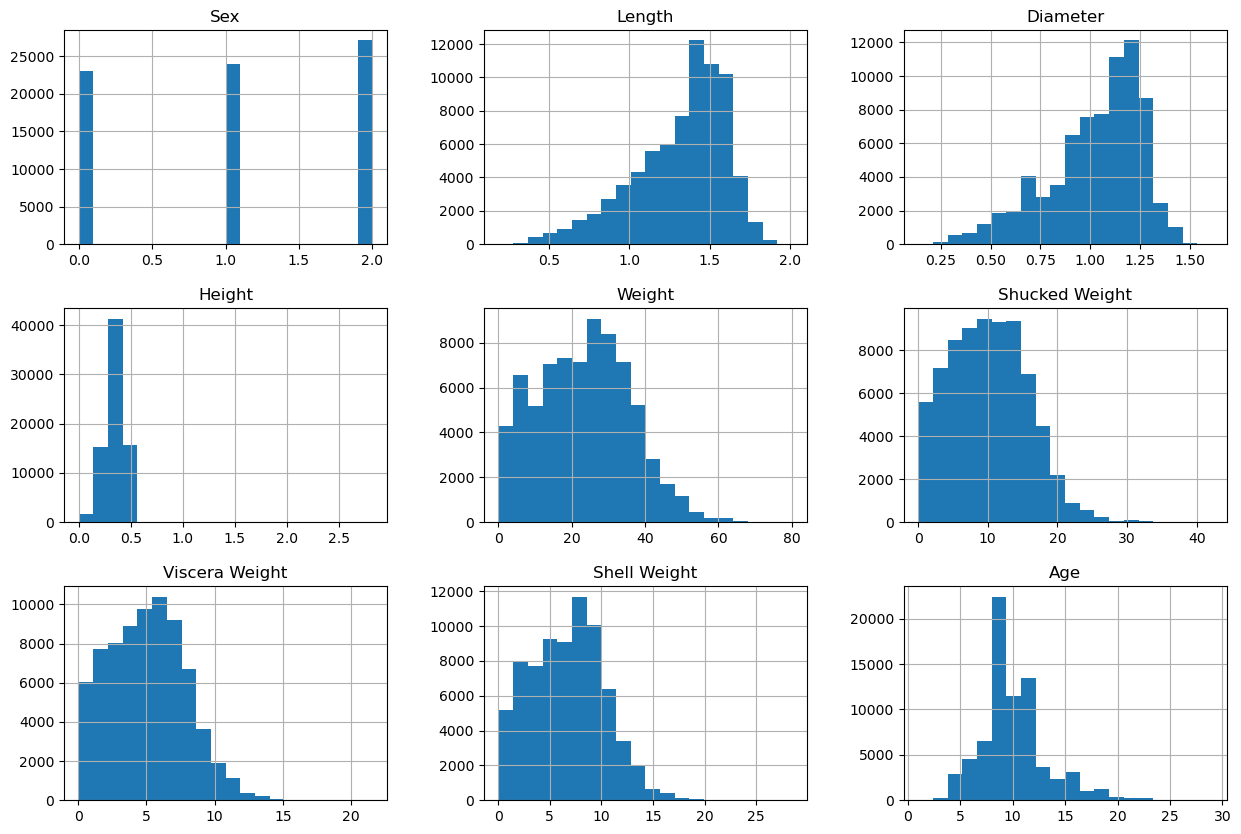

In [16]:
train.hist(bins=20, figsize=(15,10))

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">using Z-score method to eliminate the outliers

In [17]:
from scipy.stats import zscore

z=np.abs(zscore(train))
z

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,0.067040,0.721238,0.633982,0.292400,0.441804,0.467188,0.569186,0.453376,0.304805
1,0.067040,0.755712,0.840356,0.794163,1.025198,0.993688,0.978880,0.926788,0.619749
2,1.151518,0.243401,0.370707,0.292400,0.110076,0.219924,0.178363,0.017224,0.304805
3,1.285599,1.329394,1.634426,1.650603,2.156483,1.824616,2.124622,2.308095,0.325083
4,0.067040,0.234435,0.050532,0.115061,0.007598,0.333464,0.197233,0.214955,0.619749
...,...,...,...,...,...,...,...,...,...
74046,1.285599,1.199075,1.002567,0.971501,2.156483,1.882648,1.899000,1.564626,0.010139
74047,0.067040,0.842591,0.682391,0.794163,1.022957,1.029011,0.989031,0.887242,1.249637
74048,1.285599,0.590919,0.739292,0.699861,0.482150,0.391495,0.888951,0.378238,0.010139


In [18]:
train_new=train[(z<3).all(axis=1)]
train_new

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,0,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,1,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,0,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">correlation after eliminating the outliers

<Axes: >

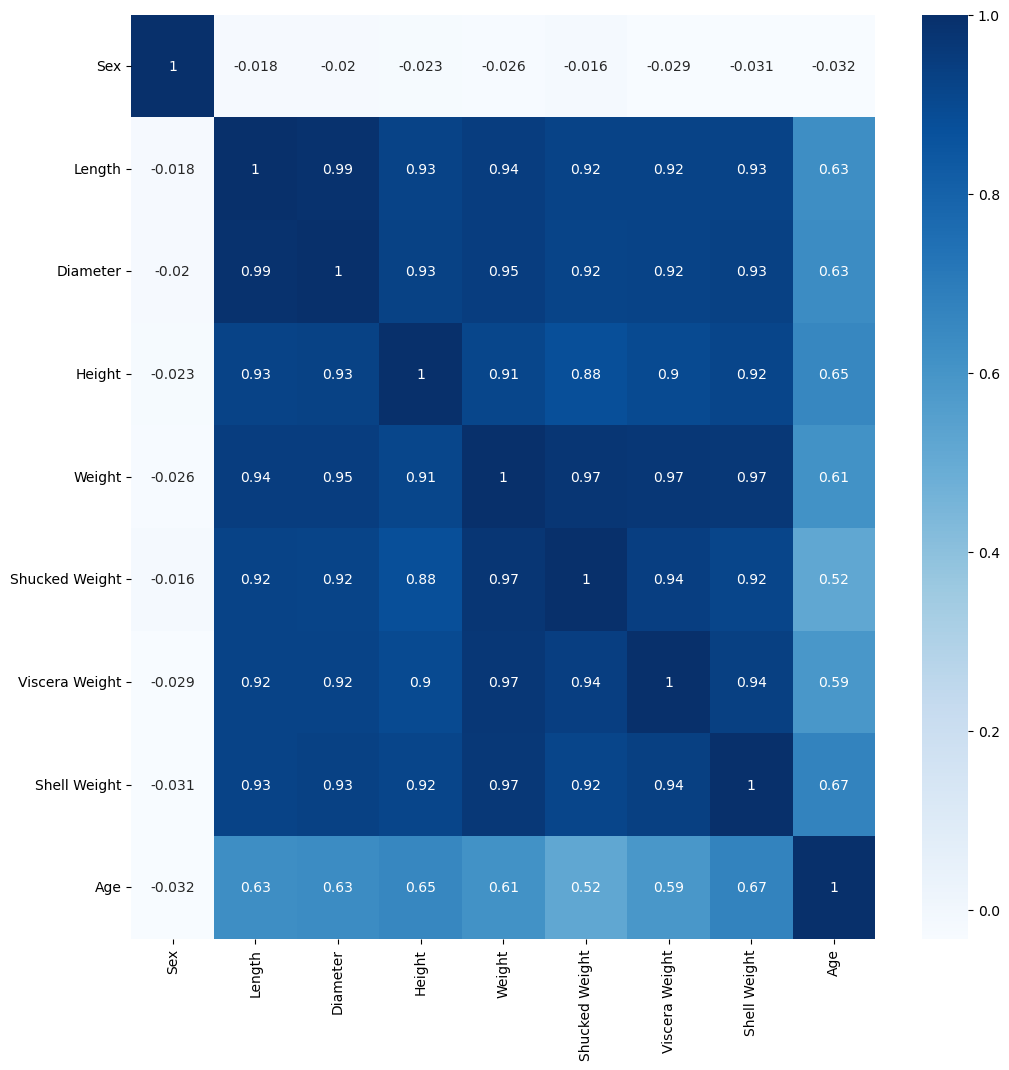

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(train_new.corr(),cmap='Blues',annot=True)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    <p style='text-align:center'> Scaling the Data</p>
   </div>

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [21]:
cols = ['Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight']

for col in cols:
    train_new[col] = sc.fit_transform(train_new[[col]])
    
for col in cols:
    test[col] = sc.fit_transform(test[[col]])



In [22]:
train_new.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,1,0.750653,0.659592,0.315031,0.482864,0.501619,0.608657,0.503291,9
1,1,-0.788398,-0.873927,-0.829764,-1.046376,-1.015155,-0.995804,-0.947599,8
2,2,0.252725,0.385749,0.315031,0.137061,0.244894,0.203596,0.008575,9
3,0,1.384380,1.700195,1.746025,2.270287,1.910987,2.220756,2.453055,11
4,1,-0.245204,-0.052399,-0.114267,0.014395,0.362778,-0.185683,-0.199289,8


In [23]:
test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,1,-0.940227,-1.115249,-0.798762,-1.174409,-1.153502,-1.197655,-1.125492
1,74052,1,-0.548169,-0.586910,-0.798762,-0.629467,-0.552334,-0.654334,-0.776635
2,74053,0,-0.112548,-0.164238,-0.256807,-0.703471,-0.815029,-0.425835,-0.538778
3,74054,0,0.802256,-0.164238,0.420637,0.388656,0.579278,0.528784,0.079651
4,74055,1,-0.722417,-0.745411,-0.934251,-0.925485,-0.820081,-0.933611,-0.955027


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    Before and after eliminating the outliers</div>

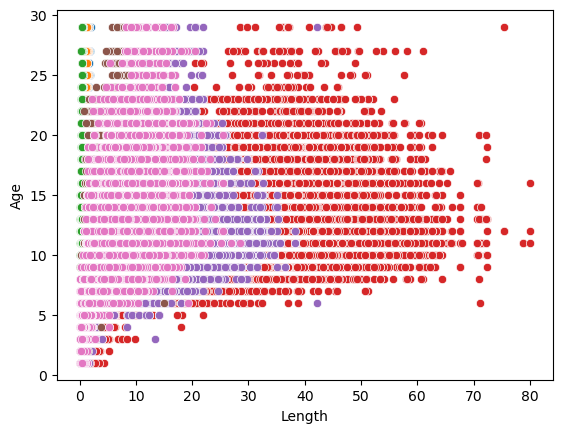

In [24]:
for col in cols:
    sns.scatterplot(train, x=col, y='Age')

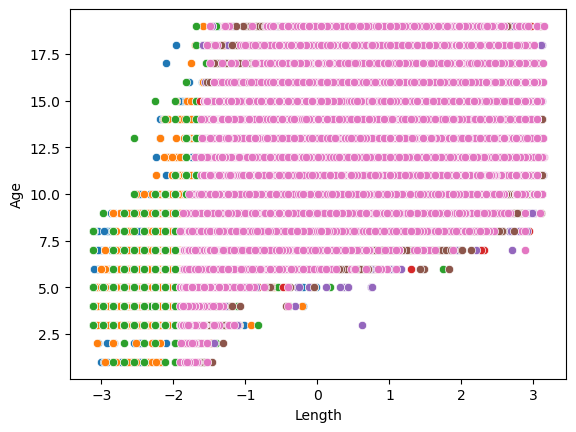

In [25]:
for col in cols:
    sns.scatterplot(train_new, x=col, y='Age')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    Assigning the features and labels
    </div>

In [26]:
X = train_new.iloc[:,0:-1]

In [27]:
y = train_new.iloc[:,-1]


In [28]:
y.head()

id
0     9
1     8
2     9
3    11
4     8
Name: Age, dtype: int64

In [29]:
X.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
0,1,0.750653,0.659592,0.315031,0.482864,0.501619,0.608657,0.503291
1,1,-0.788398,-0.873927,-0.829764,-1.046376,-1.015155,-0.995804,-0.947599
2,2,0.252725,0.385749,0.315031,0.137061,0.244894,0.203596,0.008575
3,0,1.384380,1.700195,1.746025,2.270287,1.910987,2.220756,2.453055
4,1,-0.245204,-0.052399,-0.114267,0.014395,0.362778,-0.185683,-0.199289


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    <p style='text-align:center'>Now we can split the data into training and test data</p>
    </div>

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">Using the Random Forest Regressor</div>

In [31]:
rf = RandomForestRegressor(max_depth=15,n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, random_state=42)

In [32]:
rf_preds = rf.predict(X_test)

In [33]:
print('train score: ',rf.score(X_train,y_train))
print('test score: ',rf.score(X_test,y_test))
print('Mean Absolute Error: ',mean_absolute_error(y_test,rf_preds))

train score:  0.8077638462882644
test score:  0.5744211225483838
Mean Absolute Error:  1.3310730489856237


In [34]:
test.set_index('id',inplace=True)

In [35]:
sub = pd.DataFrame({'id':testid,'Age':rf.predict(test)})

In [36]:
sub

,id,Age
0,74051,7.658774
1,74052,7.657221
2,74053,10.876590
3,74054,10.657022
4,74055,7.585216
...,...,...
49363,123414,9.992899
49364,123415,8.156544
49365,123416,12.358047
49366,123417,9.621989


In [37]:
sub.to_csv('/kaggle/working/sub_rf.csv',index=False)

# Thank You